# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>


#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm

****

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

#### Initial exploration of the data:

In [92]:
#Get a general idea of the dataframe
df.tail(3)

,temperature,gender,heart_rate
127,98.2,F,73.0
128,97.9,M,72.0
129,98.7,F,59.0


In [7]:
#Get quantitative overview
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


From the above we see that there are 130 observations in the data. It is interesting to note that both the mean, 98.25, and the median, 98.30, are below the held standard of 98.6. 

### Question 1: Checking Normality
<br>
A graphical overview of the distribution

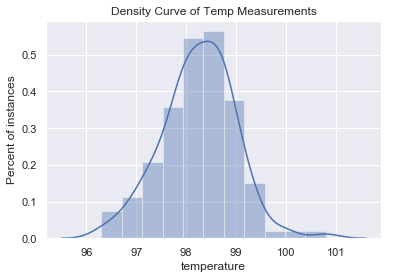

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

#Plot the density distribution with bins as the approximate sqrt of rows
_ = sns.distplot(df.temperature, bins=11)
_ = plt.ylabel('Percent of instances')
_ = plt.title('Density Curve of Temp Measurements')

Here we can compare the sampled data against a theoretical normal distribution of the same mean and standard deviation.

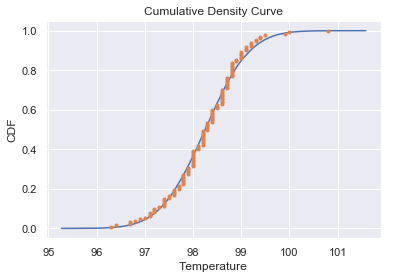

In [28]:
#Draw random samples and create x and y values for the theoretical curve
theor_samples = np.random.normal(98.249, 0.733, 100000)
x_theor = np.sort(theor_samples)
y_theor = np.arange(1, len(x_theor) + 1) / len(x_theor)

#Now create values for the curve of the actual data
x = np.sort(df['temperature'])
y = np.arange(1, len(x) + 1) / len(x)

#Overlay the data and the theoretical curve as a cumulative distribution
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')
_ = plt.title('Cumulative Density Curve')

From the density curves above, the data look to be normally distributed.
<br>
<br>
Now let's test it mathematically using scipy to run a Shapiro-Wilk test.

In [30]:
from scipy import stats

stat, p = stats.shapiro(df.temperature)

print(p)

0.2331680953502655


The p-value returned is not significant, suggesting we should not reject the hypothesis that our data comes from a normal population. From these three tests we can assume that body temperatures are normally distributed.

### Quesion 2: Sample Size and Independence

Having shown that our data is normally distributed, and knowing that there are 130 observations, the sample size should be large enough. Furthermore, it is reasonable to assume that one person's body temperature is not affected by another's and, therefore, they are independent.

### Question 3: Is population mean truly 98.6 degrees F

Assuming a null hypothesis that mean body temperature is 98.6 F, what is the chance of getting our result.

In [62]:
#the observed difference of the assumed mean, 98.6, and the sample mean
diff_obs = 98.6 - np.mean(df.temperature)

#Shift the sample mean to match the null hypothesis
samp_shift = df['temperature'] - np.mean(df.temperature) + 98.6

#Bootstrap a sample of new absolute differences to compare to the observed difference: diffs
diffs = np.empty(10000)
for i in range(10000):
    diffs[i] = abs(98.6 - np.mean(np.random.choice(samp_shift, size=len(samp_shift))))
    
#Compare to the observed difference and calculate the p-value    
p = np.sum(diffs >= diff_obs) / len(diffs)
print('The p-value = ', p)

The p-value =  0.0


From the bootstrap example, there are no differences from the sample of n=10,000 that are as extreme as the observed difference. This indicates that, assuming the mean body temperature is 98.6 F, we should not expect to get the mean measured in the sample. In other words, it seems likely that the assumption that body temperature is 98.6 F is false.

If we were to simply perform a z- or t-test with the observed data, opposed to bootstrapping, we would want to do a one-sample test. We are not comparing two samples, but rather one sample against a single assumed value. <br>
Furtermore, because we have shown that the data is normally distributed and we have a fairly high sample size, we calculate the p-value using a z-statistic. Although we do not know the population standard deviation, indicating a t-statistic is required, the sample size is well over the benchmark of 30, so the standard deviation can be adequately estimated.

In [74]:
#Calculate the z_stat
z_stat = (df.temperature.mean() - 98.6) / (np.std(df.temperature) / np.sqrt(len(df)))

#Now calculate the p-value given z_stat. The z_stat is one-sided, so the result is multiplied by two
p = 2 * stats.norm.cdf(z_stat)
print(p)

4.3523151658821886e-08


Now try a t-test:

In [75]:
stat, p = stats.ttest_1samp(df.temperature, 98.6)

print(p)

2.4106320415561276e-07


The p-value for the t-test is slighly larger due to the larger tails of the t-distribution, but in general, both values are very low and lead to a rejection of the null hypothesis.

### Question 4: Smaller samples

With a smaller sample size, a t-statistic is more appropriate. But first, here's the z-stat:

In [86]:
small_samp = np.random.choice(df.temperature, size=10)

#Calculate the z_stat of the smaller sample
z_stat = (small_samp.mean() - 98.6) / (np.std(small_samp) / np.sqrt(len(small_samp)))

#Now calculate the p-value given z_stat. The z_stat is one-sided, so the result is multiplied by two
p = 2 * stats.norm.cdf(z_stat)
print(p)

0.005241082897506406


Now the t-Stat:

In [87]:
stat, p = stats.ttest_1samp(small_samp, 98.6)

print(p)

0.026538642411924513


In this case, both p-values are low, but not nearly as low as before with the larger sample. The value corresponding to the t-stat is still higher.

### Question 5: Abnormal temperatures

In [139]:
#Calculate a prediction interval
mean = df.temperature.mean()
std = df.temperature.std()

interv = stats.norm.interval(0.95, loc=mean, scale=std)
interv

(96.81221818540311, 99.68624335305844)

Abnormal temperatures would be those outside of the above interval.

### Question 6: Difference between males and females

For this exercise, the assumed temperature of 98.6 is not important. Rather, an observed difference between two groups is the value in question, and a two-sample test is appropriate.<br>
The null hypothesis in this case is that the mean temperature for women is the same as men, and the test is to calculate whether any observed difference between the two means is significant.

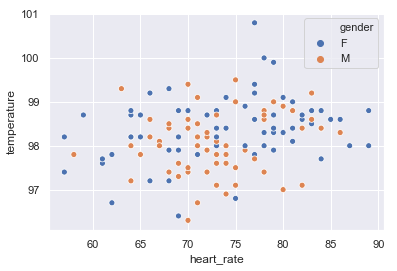

In [136]:
#First, check for differences visually
#In this case, only the y-axis is of real interest
_ = sns.scatterplot('heart_rate', 'temperature', data=df, hue='gender')

In [133]:
#Separate the values for male and female, and calculate the difference in means
male = gender[gender['gender'] == 'M']
male = np.array(male['temperature'])

female = gender[gender['gender'] == 'F']
female = np.array(female['temperature'])

obs_gender_diff = np.mean(male) - np.mean(female)
obs_gender_diff

-0.2892307692307696

In [134]:
#Recalculate 10,000 new mean differences randomly 
#and see how often we get a result as extreme as the one observed
perm_diffs = np.empty(10000)

for i in range(10000):
    comb = np.concatenate((male, female))
    permed = np.random.permutation(comb)
    perm_male = permed[:len(male)]
    perm_female = permed[len(male):]
    perm_diffs[i] = np.mean(perm_male) - np.mean(perm_female)

#The observed difference indicates male temps are lower
#therefore, the p-value tests for values as low or lower
p = np.sum(perm_diffs <= obs_gender_diff) / len(perm_diffs)

print('P-value is ', p)

P-value is  0.0144


For this exercise, a permutation method was used. The values for male and female were randomly re-assigned and the difference in means between the two groups was re-calculated 10,000 times. Based on the results, the odds of getting the observed result merely by chance is a little over 1%. This is quite low, and might suggest that the null hypothesis should be rejected and that male body temperatures are lower than those of females.<br>
However, caution might be wise before accepting conclusions. It doesn't feel intuitive that there should be a difference based on gender. Also, judging by the scatter plot above, only females were recorded with temps near or above 100 degrees, so maybe by coincidence the only people with an illness when this sample was drawn happened to be female. This could skew the results.